# Doppler and Delay Scan

### Configure Ipython

In [1]:
#import python packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticks
%matplotlib inline
#import custom packages
import oskar, sspals

### Import Data

In [2]:
rid = '20160229_105246'
h5 = oskar.h5_data(rid)             # data
h5.load_log()
out_dire = h5.out_dire("Analysis")  # output

In [3]:
#read data
allDF = h5.load_av(verbose=True, loop=True, exclude=['avL_SSPALS.dat'])
allDF.head()

Loaded: av_SSPALS.dat


,DLY_EA,IR,UV,VOL_u100,VOL_u101,t0_reps,t0_mean,t0_std,t0_sem,DF_reps,...,DF_std,DF_sem,Range_reps,Range_mean,Range_std,Range_sem,FWHM_reps,FWHM_mean,FWHM_std,FWHM_sem
VID,,,,,,,,,,,,,,,,,,,,,
1,5.650000e-07,749.076507,243.2,2000,2000,600,7.690328e-08,2.892699e-10,1.180939e-11,600,...,0.008284,0.000338,600,0.226632,0.013476,0.000550,600,9.966344e-09,6.126043e-10,2.500947e-11
2,5.670000e-07,749.076507,243.2,2000,2000,600,7.689785e-08,2.815527e-10,1.149434e-11,600,...,0.008823,0.000360,600,0.225022,0.012387,0.000506,600,9.970576e-09,6.534223e-10,2.667585e-11
3,5.690000e-07,749.076507,243.2,2000,2000,596,7.688331e-08,2.840931e-10,1.163691e-11,596,...,0.008303,0.000340,596,0.225544,0.012941,0.000530,596,9.948595e-09,6.413362e-10,2.627016e-11
4,5.710000e-07,749.076507,243.2,2000,2000,600,7.687589e-08,2.727134e-10,1.113348e-11,600,...,0.009012,0.000368,600,0.225185,0.012628,0.000516,600,9.929485e-09,6.284495e-10,2.565634e-11
5,5.730000e-07,749.076507,243.2,2000,2000,600,7.685759e-08,2.822664e-10,1.152348e-11,600,...,0.008209,0.000335,600,0.226199,0.012741,0.000520,600,9.916282e-09,6.482760e-10,2.646576e-11


In [4]:
allDF.describe()

,DLY_EA,IR,UV,VOL_u100,VOL_u101,t0_reps,t0_mean,t0_std,t0_sem,DF_reps,...,DF_std,DF_sem,Range_reps,Range_mean,Range_std,Range_sem,FWHM_reps,FWHM_mean,FWHM_std,FWHM_sem
count,3.600000e+01,3.600000e+01,3.600000e+01,36,36,36.000000,3.600000e+01,3.600000e+01,3.600000e+01,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,3.600000e+01,3.600000e+01,3.600000e+01
mean,6.000000e-07,7.490765e+02,2.432000e+02,2000,2000,572.222222,7.691108e-08,2.873521e-10,1.203641e-11,572.222222,...,0.008755,0.000367,572.222222,0.225774,0.012866,0.000539,572.222222,9.946713e-09,6.299311e-10,2.638915e-11
std,2.107131e-08,5.764975e-13,5.764975e-14,0,0,44.952109,2.911288e-11,1.524626e-11,7.389271e-13,44.952109,...,0.000306,0.000021,44.952109,0.000963,0.000525,0.000032,44.952109,3.173098e-11,2.338829e-11,1.314898e-12
min,5.650000e-07,7.490765e+02,2.432000e+02,2000,2000,499.000000,7.685759e-08,2.536571e-10,1.088131e-11,499.000000,...,0.008143,0.000335,499.000000,0.223561,0.011399,0.000498,499.000000,9.884002e-09,5.787233e-10,2.436747e-11
25%,5.825000e-07,7.490765e+02,2.432000e+02,2000,2000,506.750000,7.689269e-08,2.775583e-10,1.160855e-11,506.750000,...,0.008605,0.000352,506.750000,0.225222,0.012512,0.000515,506.750000,9.926860e-09,6.152192e-10,2.533842e-11
50%,6.000000e-07,7.490765e+02,2.432000e+02,2000,2000,600.000000,7.690462e-08,2.891161e-10,1.183884e-11,600.000000,...,0.008803,0.000364,600.000000,0.225613,0.012790,0.000530,600.000000,9.946080e-09,6.275295e-10,2.629171e-11
75%,6.175000e-07,7.490765e+02,2.432000e+02,2000,2000,600.000000,7.692722e-08,2.962124e-10,1.240240e-11,600.000000,...,0.009006,0.000382,600.000000,0.226329,0.013172,0.000556,600.000000,9.967757e-09,6.469510e-10,2.706175e-11
max,6.350000e-07,7.490765e+02,2.432000e+02,2000,2000,600.000000,7.696376e-08,3.236393e-10,1.373624e-11,600.000000,...,0.009324,0.000408,600.000000,0.228205,0.014155,0.000627,600.000000,1.001493e-08,6.843281e-10,2.954043e-11


## Plot Data

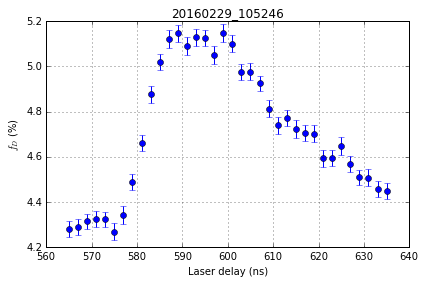

In [24]:
X = 'DLY_EA'
Y = 'DF'
y_append = ''
y_rescale = 100.0
#plot setup
fig, ax = plt.subplots()

#plot
x = allDF[:][X].values * 1e9
y = allDF[:][Y+'_mean'+y_append].values * y_rescale
yerr = allDF[:][Y+'_sem'+y_append].values * y_rescale
ax.errorbar(x, y, yerr=yerr, fmt ='o')

#format
xs = allDF[:][X] # all x values
#x_range = xs.max()-xs.min()
#ax.set_xlim(xs.min()-x_range*0.02, xs.max()+x_range*0.02)
ax.grid(True)

#labels
ax.set_ylabel(r"$f_{D}$ (%)")
ax.set_xlabel(r"Laser delay (ns)")
plt.title(rid)

#save data
plt.tight_layout()
fileout = os.path.join(out_dire, "Delay_DF.png")
plt.savefig(fileout, dpi=300)

## Signal

In [17]:
#calculate signal for each voltage
back = allDF[(allDF[X] > 640e-9) | (allDF[X] < 575e-9)][Y+'_mean'+y_append] #define background
bk = back.mean()
bk_sem = back.std()/np.sqrt(back.count())
sig = sspals.signal(allDF[Y+'_mean'+y_append].values, allDF[Y+'_sem'+y_append].values, bk, bk_sem)
allDF['S'] = sig[0]
allDF['S_err'] = sig[1]

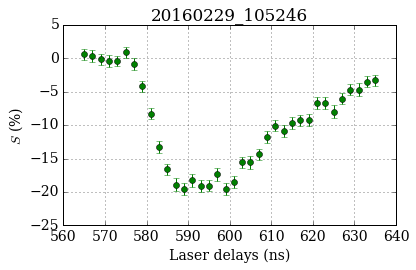

In [36]:
#plot setup
fig, ax = plt.subplots()

#plot
x = allDF[:][X].values * 1e9
y = allDF[:]['S'].values
yerr = allDF[:]['S_err'].values
ax.errorbar(x, y, yerr=yerr, fmt ='o', c='g')
    
#format
ax.set_ylabel(r"$S$ (%)")
ax.set_xlabel(r"Laser delays (ns)")
ax.grid(True)

plt.title(rid)
plt.tight_layout()

#save data
fileout = os.path.join(out_dire, "Delay_S.png")
plt.savefig(fileout, dpi=300)
plt.show()

# Posh plot

In [34]:
from matplotlib.ticker import MultipleLocator
#Use latex fonts, set default fontsize
plt.rc('text', usetex=False)
plt.rc('font', family='serif', size=14)
#set labelsize
LBLS = 16

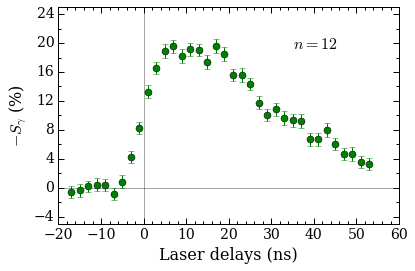

In [55]:
#plot setup
fig, ax = plt.subplots(figsize=(6, 4))

ax.axhline(0, c='k', alpha=0.7, lw=0.5)
ax.axvline(0, c='k', alpha=0.7, lw=0.5)

#plot
x = allDF[:][X].values * 1e9 - 582.0
y = -allDF[:]['S'].values
yerr = allDF[:]['S_err'].values
ax.errorbar(x, y, yerr=yerr, fmt ='o', c='g', ms=7)
    
#format
ax.set_ylabel(r"$-S_\gamma$ (%)", fontsize=LBLS)
ax.set_xlabel(r"Laser delays (ns)", fontsize=LBLS)

ax.tick_params(axis='both', which='major', length=6, width=1)
ax.tick_params(axis='both', which='minor', length=3, width=1)

majorLocator = MultipleLocator(10)
minorLocator = MultipleLocator(2)
ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_minor_locator(minorLocator)

majorLocator = MultipleLocator(4)
minorLocator = MultipleLocator(2)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_minor_locator(minorLocator)

fig.text(0.75, 0.8, '$n=12$', ha='center', fontsize=LBLS, family ='serif')

#save data
plt.tight_layout()
fileout = os.path.join('C:\Users\Adam\Documents\GitHub\Rydberg\Rydberg_decay', "delay.pdf")
plt.savefig(fileout, dpi=300)
plt.show()